In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
import pandas as pd

tickerSymbol = 'SPY'

tickerData = yf.Ticker(tickerSymbol)

today = datetime.today().strftime('%Y-%m-%d')
ten_years_ago = (datetime.today() - timedelta(days=10*365)).strftime('%Y-%m-%d')

data = tickerData.history(period='1d', start=ten_years_ago, end=today)

display(data.dtypes)


Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

In [6]:
# ARMA

ts = data['Close']

# The order (p,q) needs to be specified
# p: number of autoregressive terms, q: number of moving average terms
model = sm.tsa.arima.ARIMA(ts, order=(1,0,1))
results = model.fit()

# Summary of the model
print(results.summary())


/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alex/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  war

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2514
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6572.163
Date:                Mon, 29 Jan 2024   AIC                          13152.326
Time:                        10:22:31   BIC                          13175.645
Sample:                             0   HQIC                         13160.790
                               - 2514                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.2240    179.871      1.569      0.117     -70.317     634.764
ar.L1          0.9998      0.001   1430.005      0.000       0.998       1.001
ma.L1         -0.0693      0.010     -6.953      0.0

In [15]:
# ARIMA
ts = data['Close'].to_numpy()

# The order (p,d,q) needs to be specified
# p: number of autoregressive terms, d: degree of differencing, q: number of moving average terms
model = sm.tsa.arima.ARIMA(ts, order=(1, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2514
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6563.992
Date:                Mon, 29 Jan 2024   AIC                          13133.984
Time:                        10:40:12   BIC                          13151.472
Sample:                             0   HQIC                         13140.332
                               - 2514                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3581      0.098     -3.654      0.000      -0.550      -0.166
ma.L1          0.2820      0.102      2.771      0.006       0.083       0.481
sigma2        10.8715      0.143     76.089      0.0

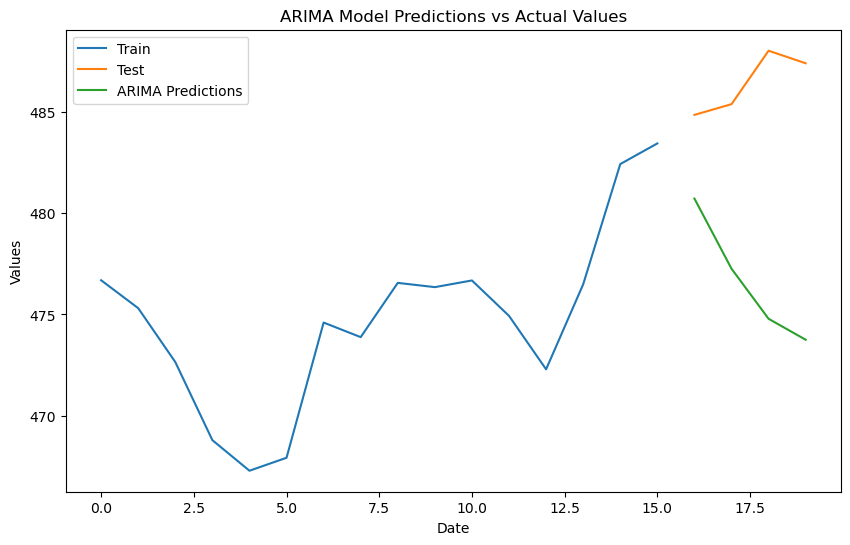

In [42]:
import matplotlib.pyplot as plt
import pmdarima as pm

ts = ts[-50:]
n = len(ts)
train = ts[0:int(n*0.8)]
ind1 = [i for i in range(int(n*0.8))]
test = ts[int(n*0.8):]
ind2 = [i for i in range(int(n*0.8), n)]

# Fit the ARIMA model
# You need to specify the order (p, d, q)
# Example: ARIMA(1, 1, 1)
model = pm.auto_arima(train)



# Make predictions
predictions = model.predict(n_periods = len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ind1, train, label='Train')
plt.plot(ind2, test, label='Test')
plt.plot(ind2, predictions, label='ARIMA Predictions')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()